In [1]:
# Food Delivery Time Prediction - End to End ML Project

"""
Project: Predict delivery time for food orders
Dataset: Kaggle Food Delivery Dataset (gauravmalik26)
Author: Ozurumba E Yadimma
"""


'\nProject: Predict delivery time for food orders\nDataset: Kaggle Food Delivery Dataset (gauravmalik26)\nAuthor: Ozurumba E Yadimma\n'

IMPORT NECESSARY LIBRARIES 


In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


DATA LOADING AND INITIAL EXPLORATION

In [5]:
#Import data
train_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\work1\food_delivery\train.csv")
test_df = pd.read_csv(r"C:\Users\LENOVO\Desktop\work1\food_delivery\test.csv")
print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (45593, 20)
Test set shape: (11399, 19)


In [6]:
#View first few rows of train_data along side data_frame summary 
print(train_df.info())
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [7]:
#View data_frame summary for test data 
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

In [8]:
#Statistical summary of data
train_df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


EXPLORATORY DATA ANALYSIS

In [10]:
train_df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [11]:
train_df['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [12]:
# Converting time taken column to int
train_df['Time_taken(min)'] = train_df['Time_taken(min)'].str.replace('(min) ', '').astype(int)
train_df['Time_taken(min)'].head()

0    24
1    33
2    26
3    21
4    30
Name: Time_taken(min), dtype: int32

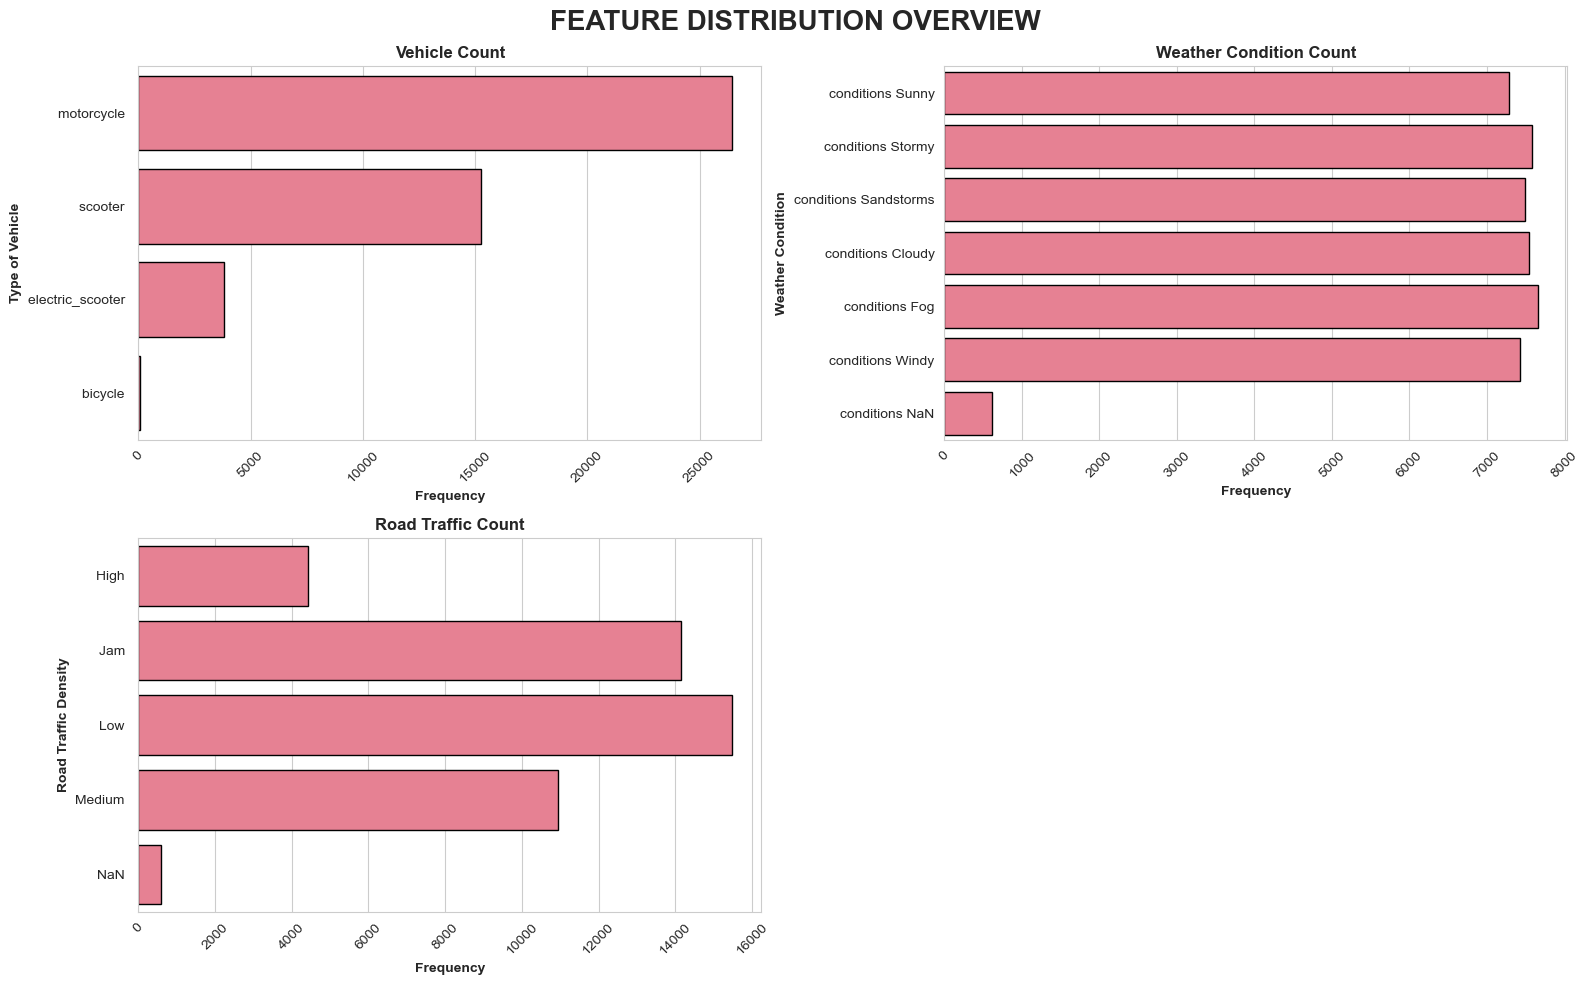

In [13]:
fig = plt.figure(figsize=(16, 10))
fig.suptitle('FEATURE DISTRIBUTION OVERVIEW', fontsize=20, fontweight='bold', y=0.98)

plt.subplot(2, 2, 1)
sns.countplot(train_df['Type_of_vehicle'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Type of Vehicle', fontweight='bold')
plt.title('Vehicle Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(train_df['Weatherconditions'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Weather Condition', fontweight='bold')
plt.title('Weather Condition Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(train_df['Road_traffic_density'], edgecolor = 'black')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Road Traffic Density', fontweight='bold')
plt.title('Road Traffic Count', fontweight='bold')
plt.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

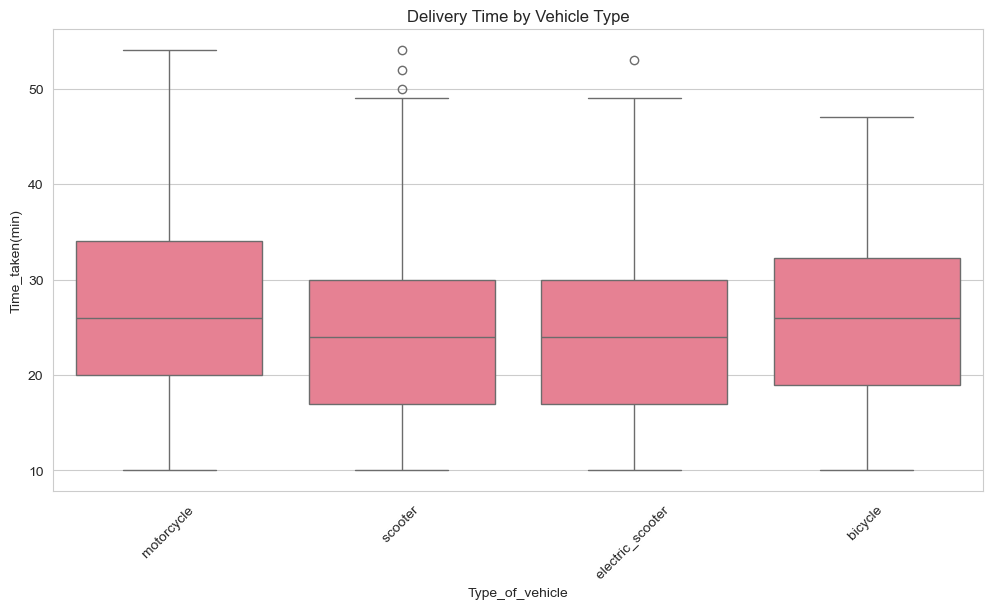

In [14]:
# Relationship between delivery time and vehicle type
sns.boxplot(data=train_df, x='Type_of_vehicle', y= 'Time_taken(min)')
plt.title('Delivery Time by Vehicle Type')
plt.xticks(rotation=45);

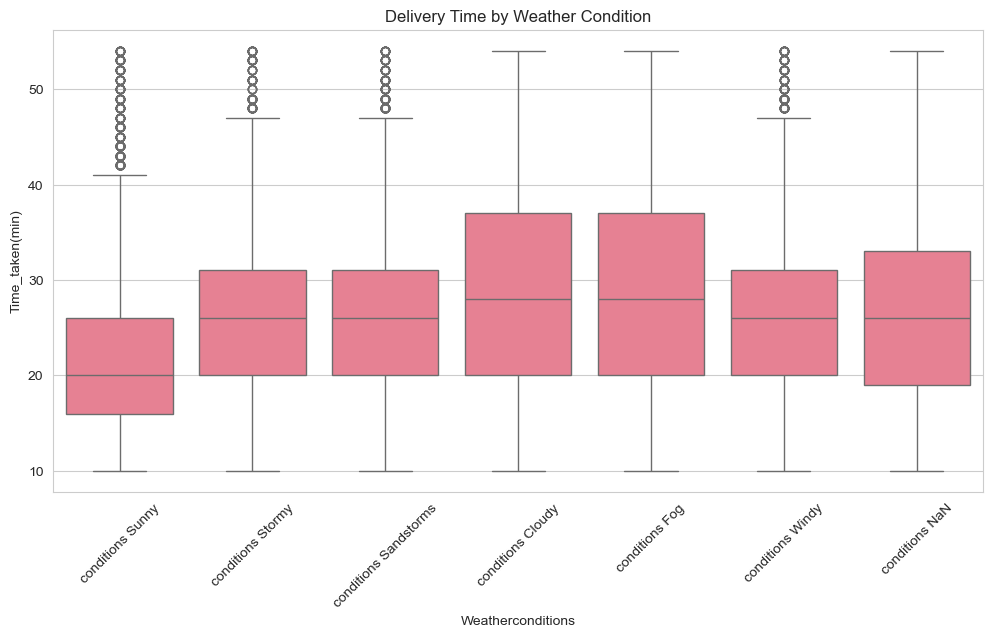

In [15]:
# Relationship between delivery time and weather condition
sns.boxplot(data=train_df, x='Weatherconditions', y= 'Time_taken(min)')
plt.title('Delivery Time by Weather Condition')
plt.xticks(rotation=45);

DATA CLEANING 

In [17]:
# Check for extreme outliers in delivery time
Q1 = train_df['Time_taken(min)'].quantile(0.25)
Q3 = train_df['Time_taken(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
outliers = train_df[(train_df['Time_taken(min)'] < lower_bound) | 
                       (train_df['Time_taken(min)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")



Outlier bounds: [-0.50, 51.50]
Number of outliers: 270 (0.59%)


In [51]:
# Handle outliers by capping
train_df['Time_taken(min)'] = np.where(train_df['Time_taken(min)'] < lower_bound, lower_bound, train_df['Time_taken(min)'])
train_df['Time_taken(min)'] = np.where(train_df['Time_taken(min)'] > upper_bound, upper_bound, train_df['Time_taken(min)'])

In [55]:
# Check for extreme outliers in delivery time
Q1 = train_df['Time_taken(min)'].quantile(0.25)
Q3 = train_df['Time_taken(min)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
outliers = train_df[(train_df['Time_taken(min)'] < lower_bound) | 
                       (train_df['Time_taken(min)'] > upper_bound)]
print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(train_df)*100:.2f}%)")


Outlier bounds: [-0.50, 51.50]
Number of outliers: 0 (0.00%)


In [39]:
# Drop NaN values from weather conditions columns
train_df = train_df[train_df['Weatherconditions'].str.contains('NaN') == False]
train_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30


In [41]:
# Standardize weather conditions
if 'Weatherconditions' in train_df.columns:
    print("\nUnique Weather Conditions (before cleaning):")
    print(train_df['Weatherconditions'].value_counts())


Unique Weather Conditions (before cleaning):
Weatherconditions
conditions Fog           7654
conditions Stormy        7586
conditions Cloudy        7536
conditions Sandstorms    7495
conditions Windy         7422
conditions Sunny         7284
Name: count, dtype: int64


In [43]:
# Standardize weather conditions 2
train_df['Weatherconditions'] = train_df['Weatherconditions'].str.lower()
test_df['Weatherconditions'] = test_df['Weatherconditions'].str.lower()
print("\nUnique Weather Conditions (after cleaning):")
print(train_df['Weatherconditions'].value_counts())


Unique Weather Conditions (after cleaning):
Weatherconditions
conditions fog           7654
conditions stormy        7586
conditions cloudy        7536
conditions sandstorms    7495
conditions windy         7422
conditions sunny         7284
Name: count, dtype: int64
